In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
def getCSV(csv):
    dfl = pd.read_csv(csv)
    return dfl
df = getCSV(r'C:\Users\Tom\OneDrive\Documents\APROJECTS\PeatBogCounties.csv') 
print(df)

                               Statistic Label  Year         County      UNIT  \
0                                    Peat bogs  2018      Co. Clare  Hectares   
1                                    Peat bogs  2018       Co. Cork  Hectares   
2                                    Peat bogs  2018      Co. Cavan  Hectares   
3                                    Peat bogs  2018     Co. Carlow  Hectares   
4                                    Peat bogs  2018    Co. Donegal  Hectares   
..                                         ...   ...            ...       ...   
103  Share of Peat bogs and Moors & Heathlands  2018  Co. Tipperary         %   
104  Share of Peat bogs and Moors & Heathlands  2018  Co. Waterford         %   
105  Share of Peat bogs and Moors & Heathlands  2018    Co. Wicklow         %   
106  Share of Peat bogs and Moors & Heathlands  2018  Co. Westmeath         %   
107  Share of Peat bogs and Moors & Heathlands  2018    Co. Wexford         %   

             VALUE  
0     

In [8]:
filtered_df = df[df['Statistic Label']=='Share of Peat bogs and Moors & Heathlands']
print(filtered_df)

                               Statistic Label  Year         County UNIT  \
81   Share of Peat bogs and Moors & Heathlands  2018      Co. Clare    %   
82   Share of Peat bogs and Moors & Heathlands  2018       Co. Cork    %   
83   Share of Peat bogs and Moors & Heathlands  2018      Co. Cavan    %   
84   Share of Peat bogs and Moors & Heathlands  2018     Co. Carlow    %   
85   Share of Peat bogs and Moors & Heathlands  2018    Co. Donegal    %   
86   Share of Peat bogs and Moors & Heathlands  2018     Co. Dublin    %   
87   Share of Peat bogs and Moors & Heathlands  2018     Co. Galway    %   
88   Share of Peat bogs and Moors & Heathlands  2018        Ireland    %   
89   Share of Peat bogs and Moors & Heathlands  2018    Co. Kildare    %   
90   Share of Peat bogs and Moors & Heathlands  2018   Co. Kilkenny    %   
91   Share of Peat bogs and Moors & Heathlands  2018      Co. Kerry    %   
92   Share of Peat bogs and Moors & Heathlands  2018   Co. Longford    %   
93   Share o

In [9]:
filtered_df['County'] = filtered_df['County'].apply(lambda x: x[4:].upper())
condition = filtered_df['County'] == "and"
filtered_df = filtered_df[~condition]

                               Statistic Label  Year     County UNIT  \
81   Share of Peat bogs and Moors & Heathlands  2018      CLARE    %   
82   Share of Peat bogs and Moors & Heathlands  2018       CORK    %   
83   Share of Peat bogs and Moors & Heathlands  2018      CAVAN    %   
84   Share of Peat bogs and Moors & Heathlands  2018     CARLOW    %   
85   Share of Peat bogs and Moors & Heathlands  2018    DONEGAL    %   
86   Share of Peat bogs and Moors & Heathlands  2018     DUBLIN    %   
87   Share of Peat bogs and Moors & Heathlands  2018     GALWAY    %   
88   Share of Peat bogs and Moors & Heathlands  2018        AND    %   
89   Share of Peat bogs and Moors & Heathlands  2018    KILDARE    %   
90   Share of Peat bogs and Moors & Heathlands  2018   KILKENNY    %   
91   Share of Peat bogs and Moors & Heathlands  2018      KERRY    %   
92   Share of Peat bogs and Moors & Heathlands  2018   LONGFORD    %   
93   Share of Peat bogs and Moors & Heathlands  2018      LOUTH 

C:\Users\Tom\AppData\Local\Temp\ipykernel_24152\2853053036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['County'] = filtered_df['County'].apply(lambda x: x[4:].upper())


In [10]:
counties_shapefile = gpd.read_file(r'C:\Users\Tom\OneDrive\Documents\APROJECTS\Ireland_Counties\Counties___Ungen_2019.shp')
merged_data = counties_shapefile.merge(filtered_df, how='left', left_on='ENGLISH', right_on='County')

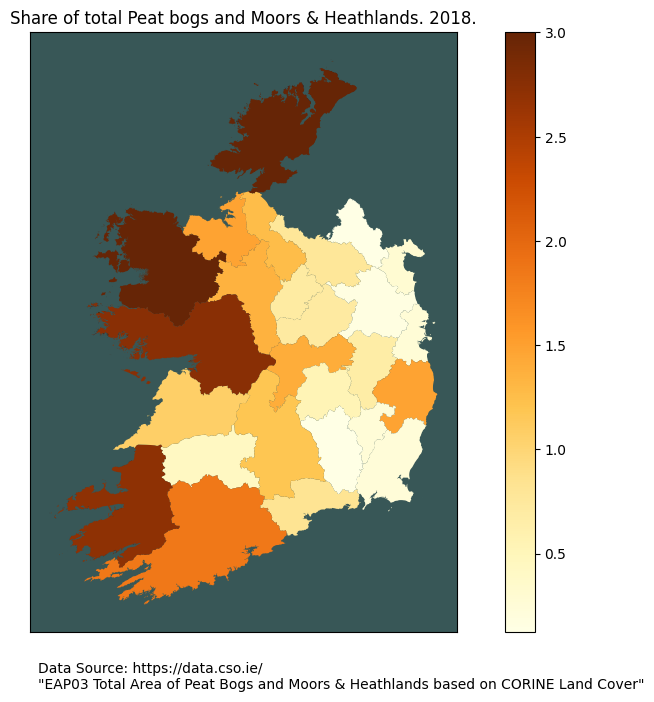

In [27]:
import numpy as np

fig, ax = plt.subplots(1,1,figsize=(12,8))

merged_data['scaled_value'] = np.log1p(merged_data['VALUE'])

merged_data.plot(column='scaled_value', cmap='YlOrBr', linewidth=0.8, ax=ax, legend=True)

title_string = "Share of total Peat bogs and Moors & Heathlands. 2018."
ax.set_title(title_string)

ax.set_facecolor('#385757') 
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')
    
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.15)
plt.text(0.02, -0.095, "Data Source: https://data.cso.ie/ \n\"EAP03 Total Area of Peat Bogs and Moors & Heathlands based on CORINE Land Cover\"", ha='left', transform=ax.transAxes)

plt.savefig('BoglandShare-2018.png')

plt.show()